# EDA  Petrol/Gas Price Worldwide

#### In this notebook, we will do exploratory data analysis and data visualization of petrol/gas price worldwide, world share and consumption per capita. We will deep dive into the dataset to view the fuel prices worldwide, GDP per capita, GDP per capita a country can buy and how many times yearly gallons per capita a country can buy.

### The approach we will be use in this notebook is as follows

##### 1.Import the useful data science libraries
##### 2.Load the dataset
##### 3.Clean dataset
##### 4.Correlation between the variables
##### 5.Exploratory data analysis to understand the data
##### 6.Data visualation

## Step1 - Import useful libraries

In [63]:

# Import numpy for numerical computation
import numpy as np

# Import pandas for data analysis
import pandas as pd

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step2 - Load Dataset

In [64]:
# Importing data set
df=pd.read_csv('./petrol2.csv',encoding='latin-1')

In [65]:
df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8


## Step2 - Data Cleaning

#### Data Cleaning involves several sub steps in itself.

##### (a) Correct the Data types.
##### (b) Drop the duplicates.
##### (c) Handle missing values.
##### (d) Drop anwanted columns.
##### (e) Merge multiple data frames.
##### (f) Set/Reset Index

In [66]:
# To see the names of the comumns
df.columns

Index(['S#', 'Country', 'Daily Oil Consumption (Barrels)', 'World Share',
       'Yearly Gallons Per Capita', 'Price Per Gallon (USD)',
       'Price Per Liter (USD)', 'Price Per Liter (PKR)',
       'GDP Per Capita ( USD )', 'Gallons GDP Per Capita Can Buy',
       'xTimes Yearly Gallons Per Capita Buy'],
      dtype='object')

In [67]:
# Number of rows and columns
df.shape

(181, 11)

###### Sub Step (a) Correct the data type

In [68]:
# To see the datatypes of all the columns
df.dtypes

S#                                        int64
Country                                  object
Daily Oil Consumption (Barrels)          object
World Share                              object
Yearly Gallons Per Capita               float64
Price Per Gallon (USD)                  float64
Price Per Liter (USD)                   float64
Price Per Liter (PKR)                   float64
GDP Per Capita ( USD )                   object
Gallons GDP Per Capita Can Buy           object
xTimes Yearly Gallons Per Capita Buy      int64
dtype: object

#### Observation: Daily Oil Consumption (Barrels) , World Share , GDP Per Capita (USD),Gallons GDP Per Capita Can Buy  have incorrect datatype

In [69]:
df['Daily Oil Consumption (Barrels)']=df['Daily Oil Consumption (Barrels)'].apply(lambda x: x.replace(',',''))
df['Daily Oil Consumption (Barrels)']=df['Daily Oil Consumption (Barrels)'].astype(float)

In [70]:
df['World Share']=df['World Share'].apply(lambda x: x.replace('%',''))
df['World Share']=df['World Share'].astype(float)

In [71]:
df['GDP Per Capita ( USD )']=df['GDP Per Capita ( USD )'].apply(lambda x: x.replace(',',''))
df['GDP Per Capita ( USD )']=df['GDP Per Capita ( USD )'].astype(float)

In [79]:
df['Gallons GDP Per Capita Can Buy']=df['Gallons GDP Per Capita Can Buy'].apply(lambda x: x.replace(',',''))
df['Gallons GDP Per Capita Can Buy']=df['Gallons GDP Per Capita Can Buy'].astype(float)

In [80]:
df.dtypes

S#                                        int64
Country                                  object
Daily Oil Consumption (Barrels)         float64
World Share                             float64
Yearly Gallons Per Capita               float64
Price Per Gallon (USD)                  float64
Price Per Liter (USD)                   float64
Price Per Liter (PKR)                   float64
GDP Per Capita ( USD )                  float64
Gallons GDP Per Capita Can Buy          float64
xTimes Yearly Gallons Per Capita Buy      int64
dtype: object

In [81]:
df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,19687287.0,20.0,934.3,5.19,1.37,289.97,63414.0,12218.0,13
1,2,China,12791553.0,13.0,138.7,5.42,1.43,302.87,10435.0,1925.0,14
2,3,India,4443000.0,5.0,51.4,5.05,1.33,281.93,1901.0,376.0,7
3,4,Japan,4012877.0,4.0,481.5,4.69,1.24,262.05,40193.0,8570.0,18
4,5,Russia,3631287.0,4.0,383.2,3.41,0.90,190.56,10127.0,2970.0,8


##### Observation: Now all the datatypes are in correct form

###### Sub Step (b) Drop the duplicate

In [82]:
df.duplicated().sum()

0

###### Observation: There is no duplicate row in the data frame

#### Sub Step (c) Handle the missing value

In [83]:
df.isnull().sum()

S#                                      0
Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
Price Per Liter (PKR)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
dtype: int64

#### Observation: There is no missing value in the data frame

#### Sub Step(d) Drop anwanted columns.

In [89]:
#  PKR to usd price has been changed so we don't need this column anymore.
df=df.drop(['Price Per Liter (PKR)','S#'],axis=1)

In [92]:
df.tail()

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
176,Belize,4001.0,0.0,166.5,6.68,1.76,4436.0,664.0,4
177,Niue,51.0,0.0,484.4,11.43,3.02,15586.0,1364.0,3
178,Saint Pierre & Miquelon,660.0,0.0,1705.1,8.27,2.19,34900.0,4220.0,2
179,Montserrat,400.0,0.0,1231.1,4.57,1.21,12589.0,2755.0,2
180,Tonga,899.0,0.0,136.3,16.20,4.28,4903.0,303.0,2


###### Obervation: Unwanted columns are deleted.

###### Sub Step (d) Merge multiple data frame

###### Observation: There is only one data frame so don't need to merge any onther data frame

#### Sub Step (f) Set/Reset index 

##### Observation: There is no need to set index and data cleaning step is completed.

### Step 4.Correlation between the variables

In [93]:
df.corr()

,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
Daily Oil Consumption (Barrels),1.000000,0.995882,0.149248,-0.029965,-0.030106,0.190066,0.051464,0.007332
World Share,0.995882,1.000000,0.137480,-0.030067,-0.030217,0.181224,0.064107,0.022268
Yearly Gallons Per Capita,0.149248,0.137480,1.000000,0.057293,0.057471,0.622038,0.150975,-0.025534
Price Per Gallon (USD),-0.029965,-0.030067,0.057293,1.000000,0.999997,0.182356,-0.127351,-0.144467
Price Per Liter (USD),-0.030106,-0.030217,0.057471,0.999997,1.000000,0.182663,-0.127428,-0.144567
GDP Per Capita ( USD ),0.190066,0.181224,0.622038,0.182356,0.182663,1.000000,0.188181,0.021875
Gallons GDP Per Capita Can Buy,0.051464,0.064107,0.150975,-0.127351,-0.127428,0.188181,1.000000,0.966148
xTimes Yearly Gallons Per Capita Buy,0.007332,0.022268,-0.025534,-0.144467,-0.144567,0.021875,0.966148,1.000000


<AxesSubplot:>

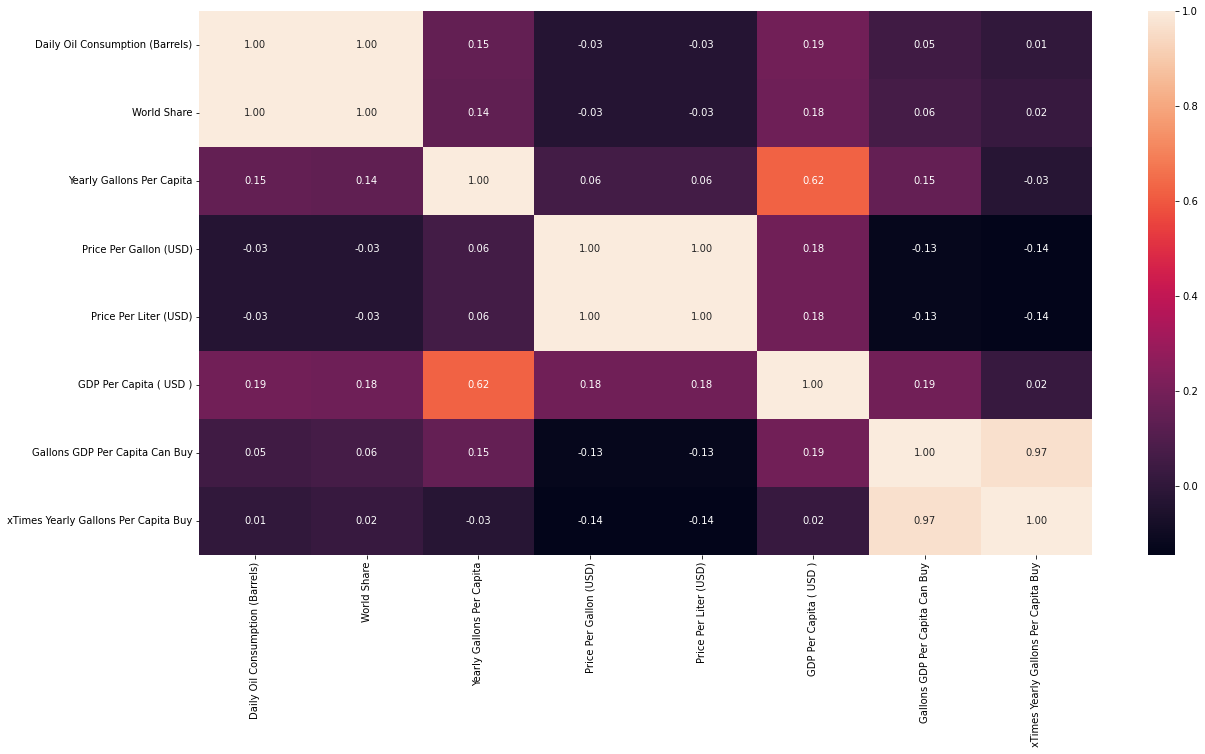

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

##### Positive correlation exists between the variables:

###### Gallons GDP Per Capita Can Buy and xTimes Yearly Gallons Per Capita Buy
###### Yearly Gallons Per Capita and GDP Per Capita (USD)
###### GDP Per Capita (USD) and Dailly Oil Consumption (Barrels)
###### GDP Per Capita (USD) and World Share
###### 